## Problem Statement:

Bike-sharing system are meant to rent the bicycle and return to the different place for the bike sharing purpose in Washington DC. You are provided with rental data spanning for 2 years. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period 





In [ ]:
## Soln: predict total count of bikes, rented during each hr

### import all packages

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### import data sets

In [74]:
test_bikes=pd.read_csv('test_bikes.csv')
train_bikes=pd.read_csv('train_bikes.csv')

In [75]:
test_bikes.head(10)

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   
5  2011-01-20 05:00:00       1        0           1        1   9.84  11.365   
6  2011-01-20 06:00:00       1        0           1        1   9.02  10.605   
7  2011-01-20 07:00:00       1        0           1        1   9.02  10.605   
8  2011-01-20 08:00:00       1        0           1        1   9.02  10.605   
9  2011-01-20 09:00:00       1        0           1        2   9.84  11.365   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014  
5        60    15.0013  
6        60    15.0013  
7        55    15.0013  
8        55    19.0012  
9        52    15.0013

In [76]:
train_bikes.head(10)

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1   9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1   9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1   9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1   9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1   9.84  14.395   
5  2011-01-01 05:00:00       1        0           0        2   9.84  12.880   
6  2011-01-01 06:00:00       1        0           0        1   9.02  13.635   
7  2011-01-01 07:00:00       1        0           0        1   8.20  12.880   
8  2011-01-01 08:00:00       1        0           0        1   9.84  14.395   
9  2011-01-01 09:00:00       1        0           0        1  13.12  17.425   

   humidity  windspeed  casual  registered  count  
0        81     0.0000       3          13     16  
1        80     0.0000       8          32     40  
2        80     0.0000       5          27     32  
3        75     0.0000       3          10     13  
4        75     0.0000       0           1      1  
5        75     6.0032       0           1      1  
6        80     0.0000       2           0      2  
7        86     0.0000       1           2      3  
8        75     0.0000       1           7      8  
9        76     0.0000       8           6     14

In [77]:
test_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [78]:
train_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [79]:
train_bikes.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [80]:
train_bikes['windspeed'].unique()

array([ 0.    ,  6.0032, 16.9979, 19.0012, 19.9995, 12.998 , 15.0013,
        8.9981, 11.0014, 22.0028, 30.0026, 23.9994, 27.9993, 26.0027,
        7.0015, 32.9975, 36.9974, 31.0009, 35.0008, 39.0007, 43.9989,
       40.9973, 51.9987, 46.0022, 50.0021, 43.0006, 56.9969, 47.9988])

In [81]:
train_bikes['humidity'].unique()

array([ 81,  80,  75,  86,  76,  77,  72,  82,  88,  87,  94, 100,  71,
        66,  57,  46,  42,  39,  44,  47,  50,  43,  40,  35,  30,  32,
        64,  69,  55,  59,  63,  68,  74,  51,  56,  52,  49,  48,  37,
        33,  28,  38,  36,  93,  29,  53,  34,  54,  41,  45,  92,  62,
        58,  61,  60,  65,  70,  27,  25,  26,  31,  73,  21,  24,  23,
        22,  19,  15,  67,  10,   8,  12,  14,  13,  17,  16,  18,  20,
        85,   0,  83,  84,  78,  79,  89,  97,  90,  96,  91], dtype=int64)

In [82]:
train_bikes[train_bikes['humidity']==0].count()

datetime      22
season        22
holiday       22
workingday    22
weather       22
temp          22
atemp         22
humidity      22
windspeed     22
casual        22
registered    22
count         22
dtype: int64

In [83]:
train_bikes['temp'].unique()

array([ 9.84,  9.02,  8.2 , 13.12, 15.58, 14.76, 17.22, 18.86, 18.04,
       16.4 , 13.94, 12.3 , 10.66,  6.56,  5.74,  7.38,  4.92, 11.48,
        4.1 ,  3.28,  2.46, 21.32, 22.96, 23.78, 24.6 , 19.68, 22.14,
       20.5 , 27.06, 26.24, 25.42, 27.88, 28.7 , 30.34, 31.16, 29.52,
       33.62, 35.26, 36.9 , 32.8 , 31.98, 34.44, 36.08, 37.72, 38.54,
        1.64,  0.82, 39.36, 41.  ])

### lets convert datetime column into seperate date and time columns

In [122]:
train_bikes1=train_bikes.copy()

In [123]:
train_bikes1.head(2)

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40

In [124]:
train_bikes1['datetime'].str.split(' ').str[0]

0        2011-01-01
1        2011-01-01
2        2011-01-01
3        2011-01-01
4        2011-01-01
            ...    
10881    2012-12-19
10882    2012-12-19
10883    2012-12-19
10884    2012-12-19
10885    2012-12-19
Name: datetime, Length: 10886, dtype: object

#### add year column

In [125]:
train_bikes1['year']=train_bikes1['datetime'].str.split(' ').str[0].str.split('-').str[0].astype(int)

In [126]:
train_bikes1['year'].unique()

array([2011, 2012])

#### add month column

In [127]:
train_bikes1['month']=train_bikes1['datetime'].str.split(' ').str[0].str.split('-').str[1].astype(int)

In [128]:
train_bikes1['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

#### add day column

In [129]:
train_bikes1['day']=train_bikes1['datetime'].str.split(' ').str[0].str.split('-').str[2].astype(int)

In [130]:
train_bikes1['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

#### add hour column

In [131]:
train_bikes1['hour']=train_bikes1['datetime'].str.split(' ').str[1].str.split(':').str[0].astype(int)

In [132]:
train_bikes1['hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [133]:
##here 0 hr means 24 or mid night 12

### now drop datetime column

In [134]:
train_bikes1.drop('datetime',axis=1,inplace=True)

In [135]:
train_bikes1

season  holiday  workingday  weather   temp   atemp  humidity  \
0           1        0           0        1   9.84  14.395        81   
1           1        0           0        1   9.02  13.635        80   
2           1        0           0        1   9.02  13.635        80   
3           1        0           0        1   9.84  14.395        75   
4           1        0           0        1   9.84  14.395        75   
...       ...      ...         ...      ...    ...     ...       ...   
10881       4        0           1        1  15.58  19.695        50   
10882       4        0           1        1  14.76  17.425        57   
10883       4        0           1        1  13.94  15.910        61   
10884       4        0           1        1  13.94  17.425        61   
10885       4        0           1        1  13.12  16.665        66   

       windspeed  casual  registered  count  year  month  day  hour  
0         0.0000       3          13     16  2011      1    1     0  
1         0.0000       8          32     40  2011      1    1     1  
2         0.0000       5          27     32  2011      1    1     2  
3         0.0000       3          10     13  2011      1    1     3  
4         0.0000       0           1      1  2011      1    1     4  
...          ...     ...         ...    ...   ...    ...  ...   ...  
10881    26.0027       7         329    336  2012     12   19    19  
10882    15.0013      10         231    241  2012     12   19    20  
10883    15.0013       4         164    168  2012     12   19    21  
10884     6.0032      12         117    129  2012     12   19    22  
10885     8.9981       4          84     88  2012     12   19    23  

[10886 rows x 15 columns]

In [136]:
train_bikes1['windspeed'].unique()

array([ 0.    ,  6.0032, 16.9979, 19.0012, 19.9995, 12.998 , 15.0013,
        8.9981, 11.0014, 22.0028, 30.0026, 23.9994, 27.9993, 26.0027,
        7.0015, 32.9975, 36.9974, 31.0009, 35.0008, 39.0007, 43.9989,
       40.9973, 51.9987, 46.0022, 50.0021, 43.0006, 56.9969, 47.9988])

#### windspeed cant be zero so we will replace 0 with mean() value

#### first convert 0 into nan value then into mean value.

In [138]:
train_bikes2=train_bikes1.copy()

In [139]:
train_bikes2['windspeed'].replace(0,np.nan,inplace=True)

In [140]:
train_bikes2.head()

season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        NaN   
1       1        0           0        1  9.02  13.635        80        NaN   
2       1        0           0        1  9.02  13.635        80        NaN   
3       1        0           0        1  9.84  14.395        75        NaN   
4       1        0           0        1  9.84  14.395        75        NaN   

   casual  registered  count  year  month  day  hour  
0       3          13     16  2011      1    1     0  
1       8          32     40  2011      1    1     1  
2       5          27     32  2011      1    1     2  
3       3          10     13  2011      1    1     3  
4       0           1      1  2011      1    1     4

In [141]:
train_bikes2['windspeed'].mean()

14.554916786796646

In [142]:
train_bikes2['windspeed'].fillna(train_bikes2['windspeed'].mean(),inplace=True)

In [143]:
train_bikes2['windspeed']

0        14.554917
1        14.554917
2        14.554917
3        14.554917
4        14.554917
           ...    
10881    26.002700
10882    15.001300
10883    15.001300
10884     6.003200
10885     8.998100
Name: windspeed, Length: 10886, dtype: float64

In [144]:
train_bikes2['windspeed'].unique()

array([14.55491679,  6.0032    , 16.9979    , 19.0012    , 19.9995    ,
       12.998     , 15.0013    ,  8.9981    , 11.0014    , 22.0028    ,
       30.0026    , 23.9994    , 27.9993    , 26.0027    ,  7.0015    ,
       32.9975    , 36.9974    , 31.0009    , 35.0008    , 39.0007    ,
       43.9989    , 40.9973    , 51.9987    , 46.0022    , 50.0021    ,
       43.0006    , 56.9969    , 47.9988    ])

In [149]:
train_bikes2['humidity'].unique()

array([ 81,  80,  75,  86,  76,  77,  72,  82,  88,  87,  94, 100,  71,
        66,  57,  46,  42,  39,  44,  47,  50,  43,  40,  35,  30,  32,
        64,  69,  55,  59,  63,  68,  74,  51,  56,  52,  49,  48,  37,
        33,  28,  38,  36,  93,  29,  53,  34,  54,  41,  45,  92,  62,
        58,  61,  60,  65,  70,  27,  25,  26,  31,  73,  21,  24,  23,
        22,  19,  15,  67,  10,   8,  12,  14,  13,  17,  16,  18,  20,
        85,   0,  83,  84,  78,  79,  89,  97,  90,  96,  91], dtype=int64)

#### humidity cannot be zero so we will replce it with mean()
#### same as windspeed


In [150]:
train_bikes2['humidity'].replace(0, np.nan,inplace=True)

In [151]:
train_bikes2['humidity'].unique()

array([ 81.,  80.,  75.,  86.,  76.,  77.,  72.,  82.,  88.,  87.,  94.,
       100.,  71.,  66.,  57.,  46.,  42.,  39.,  44.,  47.,  50.,  43.,
        40.,  35.,  30.,  32.,  64.,  69.,  55.,  59.,  63.,  68.,  74.,
        51.,  56.,  52.,  49.,  48.,  37.,  33.,  28.,  38.,  36.,  93.,
        29.,  53.,  34.,  54.,  41.,  45.,  92.,  62.,  58.,  61.,  60.,
        65.,  70.,  27.,  25.,  26.,  31.,  73.,  21.,  24.,  23.,  22.,
        19.,  15.,  67.,  10.,   8.,  12.,  14.,  13.,  17.,  16.,  18.,
        20.,  85.,  nan,  83.,  84.,  78.,  79.,  89.,  97.,  90.,  96.,
        91.])

In [153]:
train_bikes2['humidity'].mean()

62.01178203240059

In [174]:
train_bikes2['humidity'].fillna(train_bikes2['humidity'].mean(),inplace=True)

In [175]:
train_bikes2['humidity'].unique()

array([ 81.        ,  80.        ,  75.        ,  86.        ,
        76.        ,  77.        ,  72.        ,  82.        ,
        88.        ,  87.        ,  94.        , 100.        ,
        71.        ,  66.        ,  57.        ,  46.        ,
        42.        ,  39.        ,  44.        ,  47.        ,
        50.        ,  43.        ,  40.        ,  35.        ,
        30.        ,  32.        ,  64.        ,  69.        ,
        55.        ,  59.        ,  63.        ,  68.        ,
        74.        ,  51.        ,  56.        ,  52.        ,
        49.        ,  48.        ,  37.        ,  33.        ,
        28.        ,  38.        ,  36.        ,  93.        ,
        29.        ,  53.        ,  34.        ,  54.        ,
        41.        ,  45.        ,  92.        ,  62.        ,
        58.        ,  61.        ,  60.        ,  65.        ,
        70.        ,  27.        ,  25.        ,  26.        ,
        31.        ,  73.        ,  21.        ,  24.  

In [176]:
train_bikes2

season  holiday  workingday  weather   temp   atemp  humidity  \
0           1        0           0        1   9.84  14.395      81.0   
1           1        0           0        1   9.02  13.635      80.0   
2           1        0           0        1   9.02  13.635      80.0   
3           1        0           0        1   9.84  14.395      75.0   
4           1        0           0        1   9.84  14.395      75.0   
...       ...      ...         ...      ...    ...     ...       ...   
10881       4        0           1        1  15.58  19.695      50.0   
10882       4        0           1        1  14.76  17.425      57.0   
10883       4        0           1        1  13.94  15.910      61.0   
10884       4        0           1        1  13.94  17.425      61.0   
10885       4        0           1        1  13.12  16.665      66.0   

       windspeed  casual  registered  count  year  month  day  hour  
0      14.554917       3          13     16  2011      1    1     0  
1      14.554917       8          32     40  2011      1    1     1  
2      14.554917       5          27     32  2011      1    1     2  
3      14.554917       3          10     13  2011      1    1     3  
4      14.554917       0           1      1  2011      1    1     4  
...          ...     ...         ...    ...   ...    ...  ...   ...  
10881  26.002700       7         329    336  2012     12   19    19  
10882  15.001300      10         231    241  2012     12   19    20  
10883  15.001300       4         164    168  2012     12   19    21  
10884   6.003200      12         117    129  2012     12   19    22  
10885   8.998100       4          84     88  2012     12   19    23  

[10886 rows x 15 columns]

In [252]:
train_bikes2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  float64
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  year        10886 non-null  int32  
 12  month       10886 non-null  int32  
 13  day         10886 non-null  int32  
 14  hour        10886 non-null  int32  
dtypes: float64(4), int32(4), int64(7)
memory usage: 1.1 MB


#### now plot diff diff graghs and analyse data

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hour', ylabel='count'>

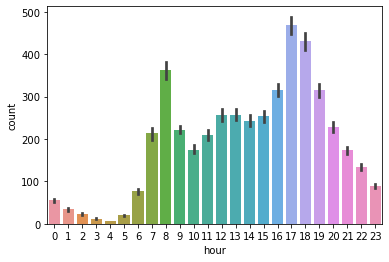

In [177]:
sns.barplot('hour','count',data=train_bikes2)

In [ ]:
## Observation: most of the people use bycycle in evenining from 16-19pm and in morning 7-9am

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hour', ylabel='count'>

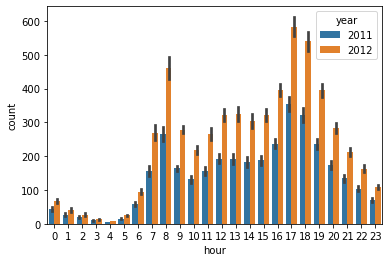

In [178]:
sns.barplot('hour','count',data=train_bikes2,hue='year')

In [179]:
## Observation: as compaired to 2011 in 2012 bycycle usage is more 

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

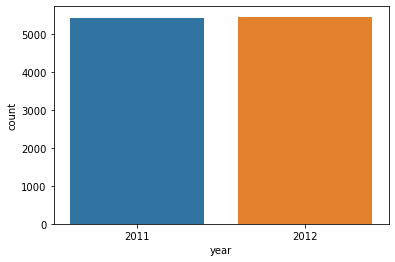

In [181]:
sns.countplot('year',data=train_bikes2)

(array([3523., 1927., 1703., 1272.,  837.,  539.,  348.,  227.,  148.,
         103.,   84.,   81.,   62.,   27.,    5.]),
 array([  0.        ,  59.06666667, 118.13333333, 177.2       ,
        236.26666667, 295.33333333, 354.4       , 413.46666667,
        472.53333333, 531.6       , 590.66666667, 649.73333333,
        708.8       , 767.86666667, 826.93333333, 886.        ]),
 <BarContainer object of 15 artists>)

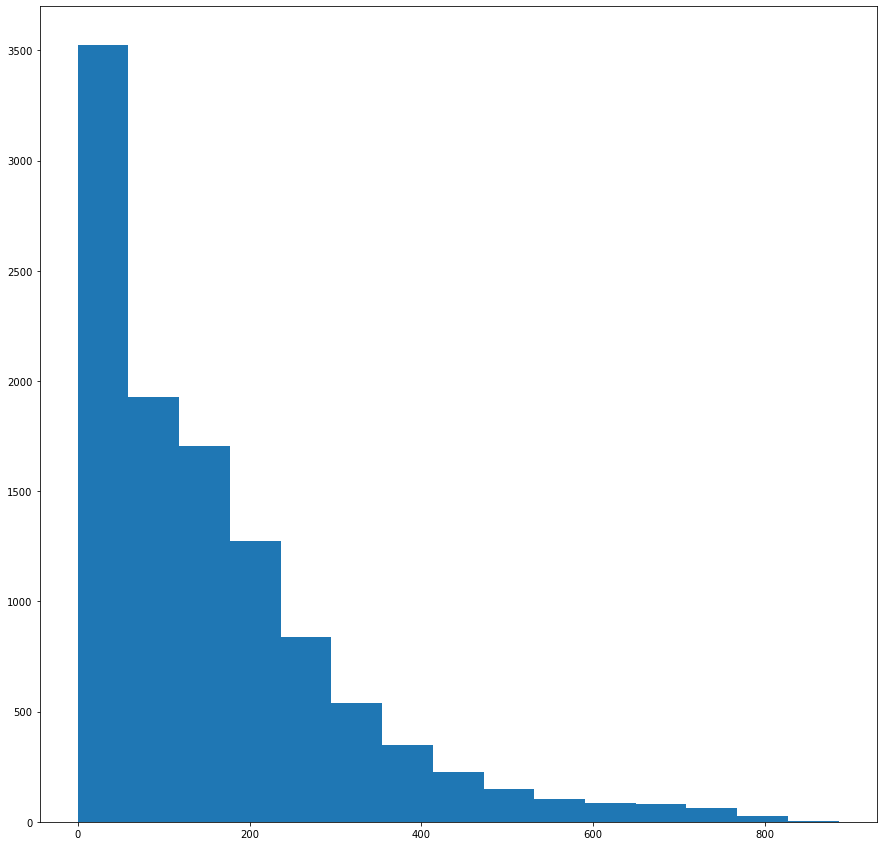

In [258]:
plt.figure(figsize=(15,15))
plt.hist(x='registered',data=train_bikes2,bins=15,histtype='barstacked',label=True)


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='casual', ylabel='registered'>

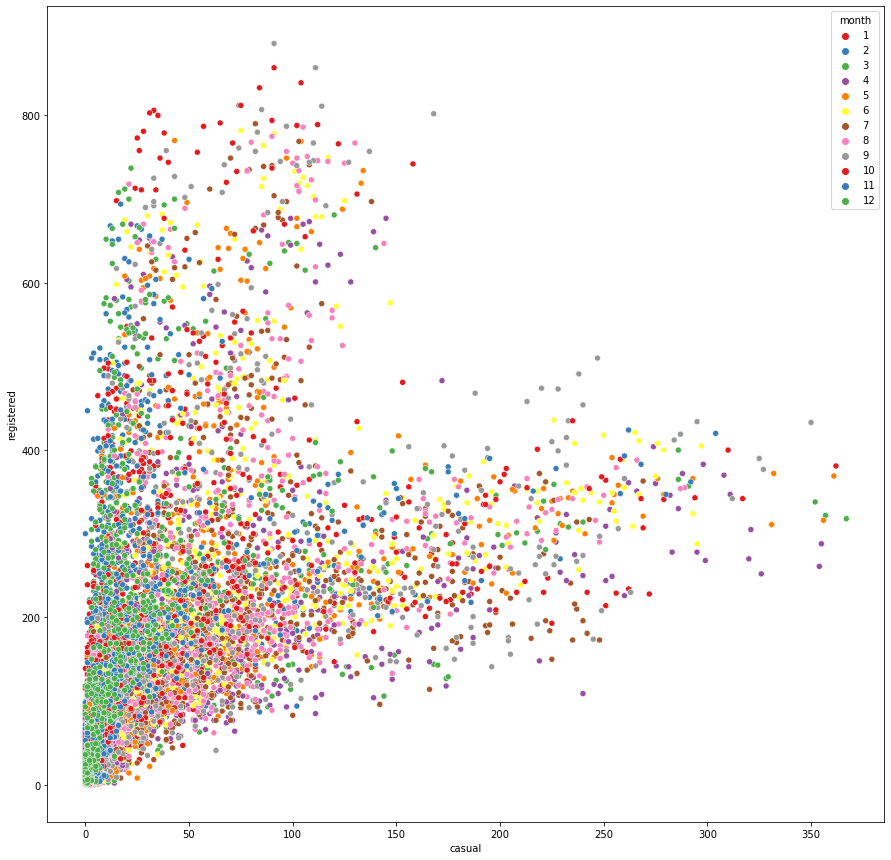

In [264]:
plt.figure(figsize=(15,15))

sns.scatterplot('casual','registered',data=train_bikes2,hue='month',palette='Set1')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='season', ylabel='registered'>

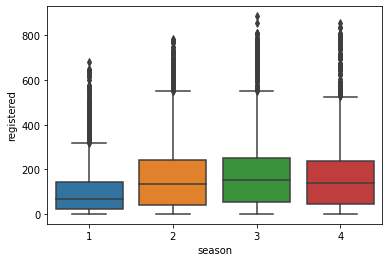

In [268]:
sns.boxplot('season','registered',data=train_bikes2)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='season', ylabel='casual'>

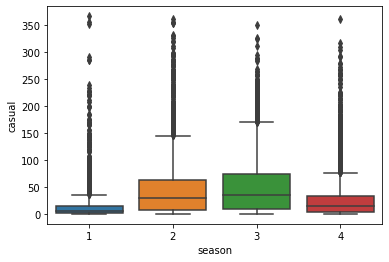

In [269]:
sns.boxplot('season','casual',data=train_bikes2)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='season', ylabel='registered'>

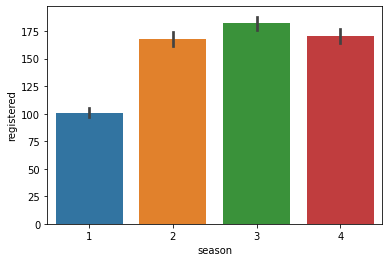

In [270]:
sns.barplot('season','registered',data=train_bikes2)

<Figure size 1440x1440 with 0 Axes>

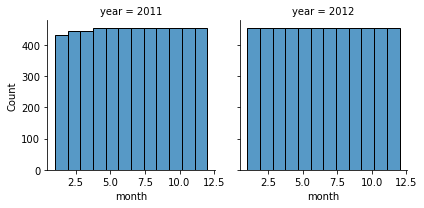

In [278]:
plt.figure(figsize=(20,20))
sns.FacetGrid(coldata=train_bikes2,col='year').map(sns.histplot,'month',bins=12)

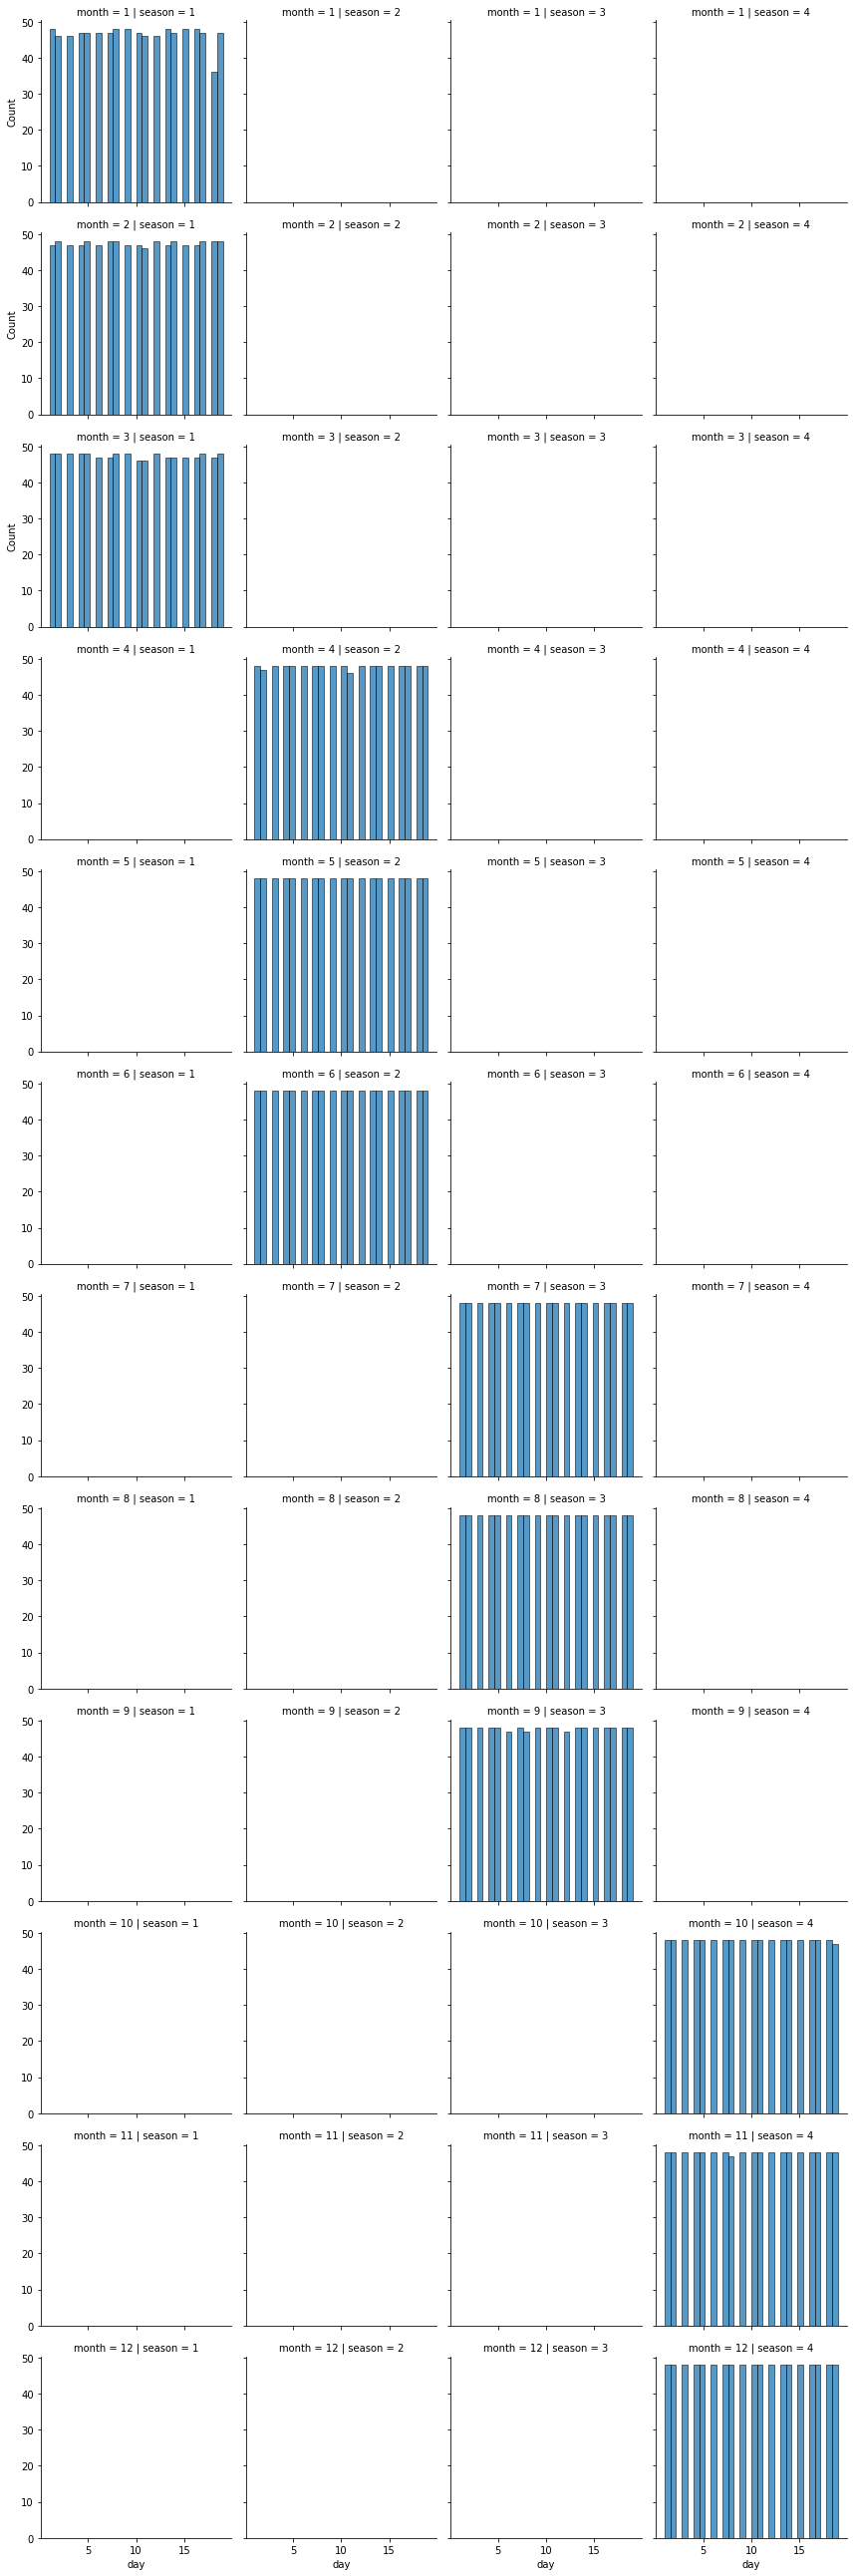

In [283]:
sns.FacetGrid(data=train_bikes2,col='season',row='month').map(sns.histplot,'day',bins=30)

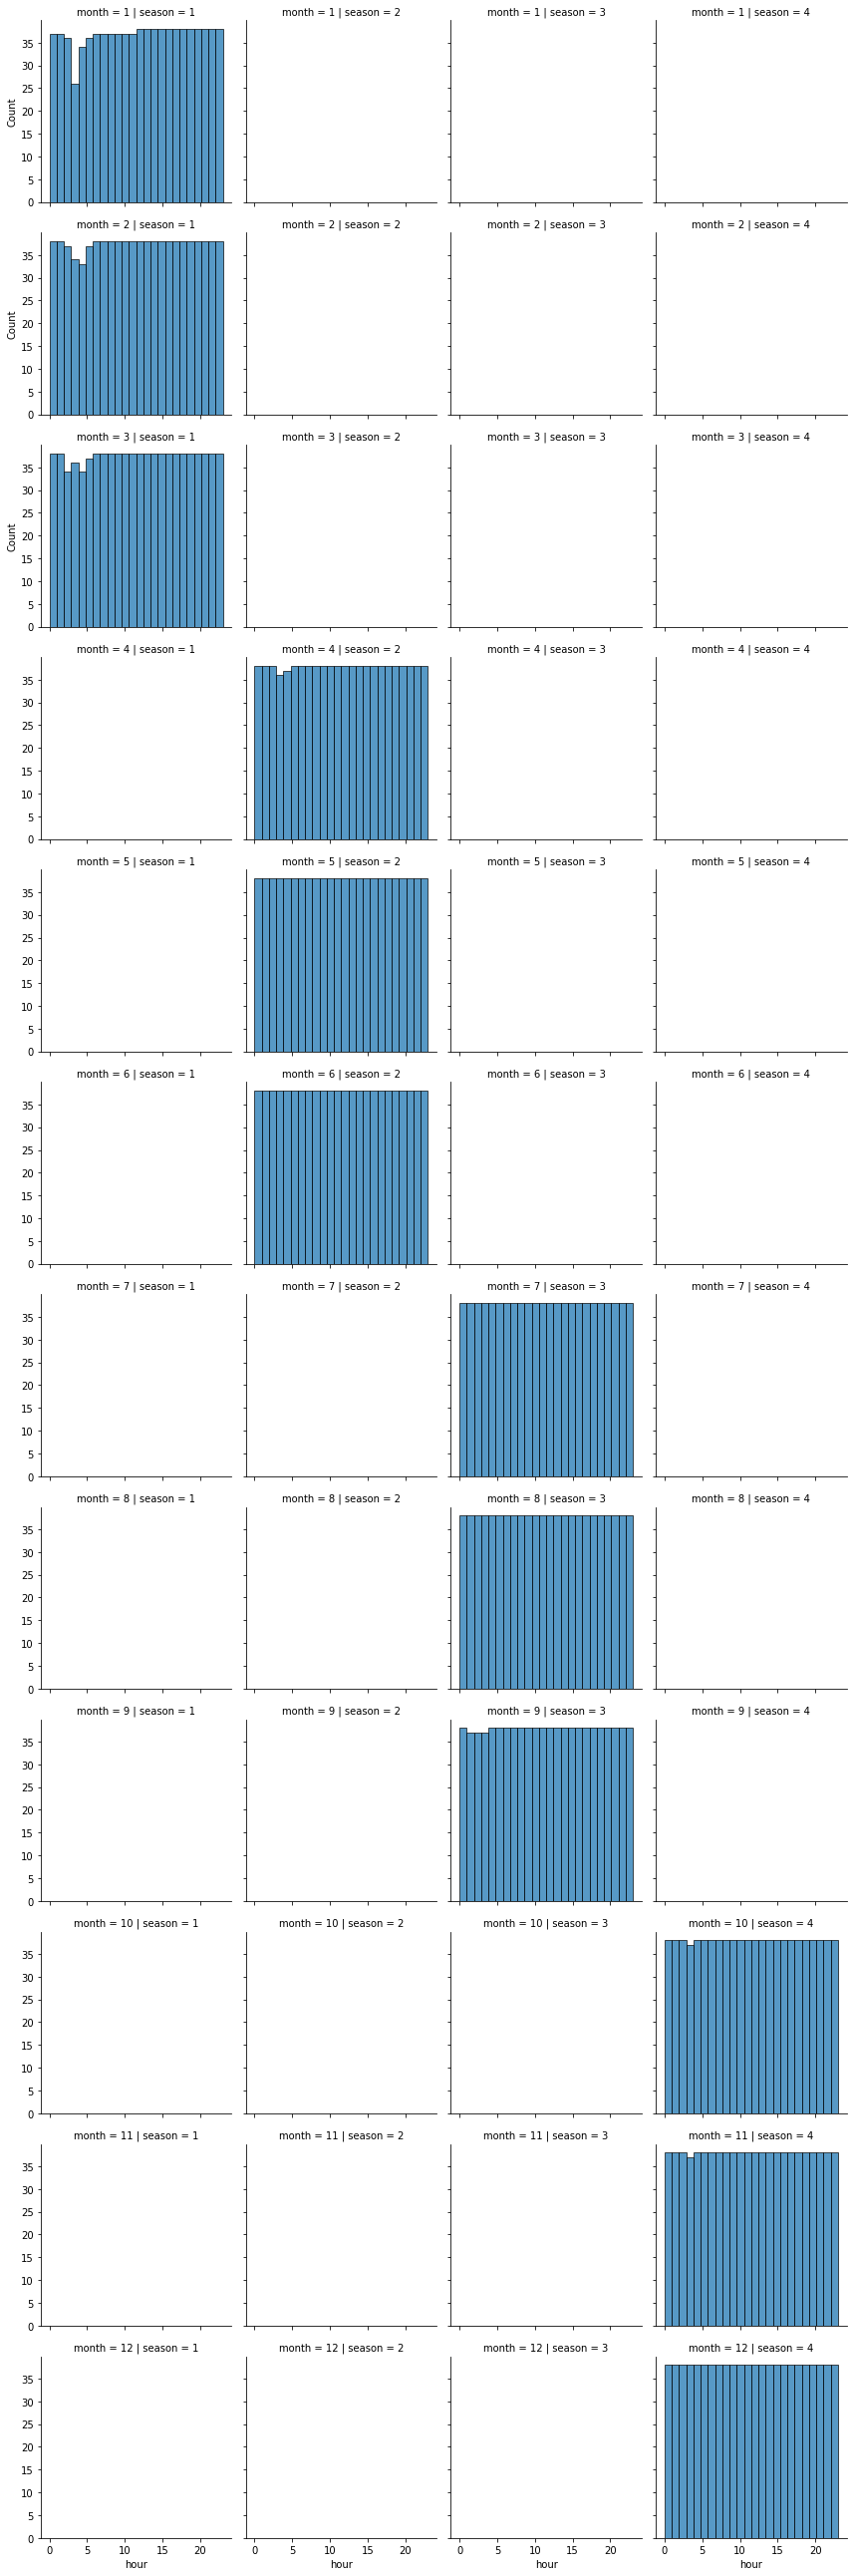

In [284]:
sns.FacetGrid(data=train_bikes2,col='season',row='month').map(sns.histplot,'hour',bins=24)

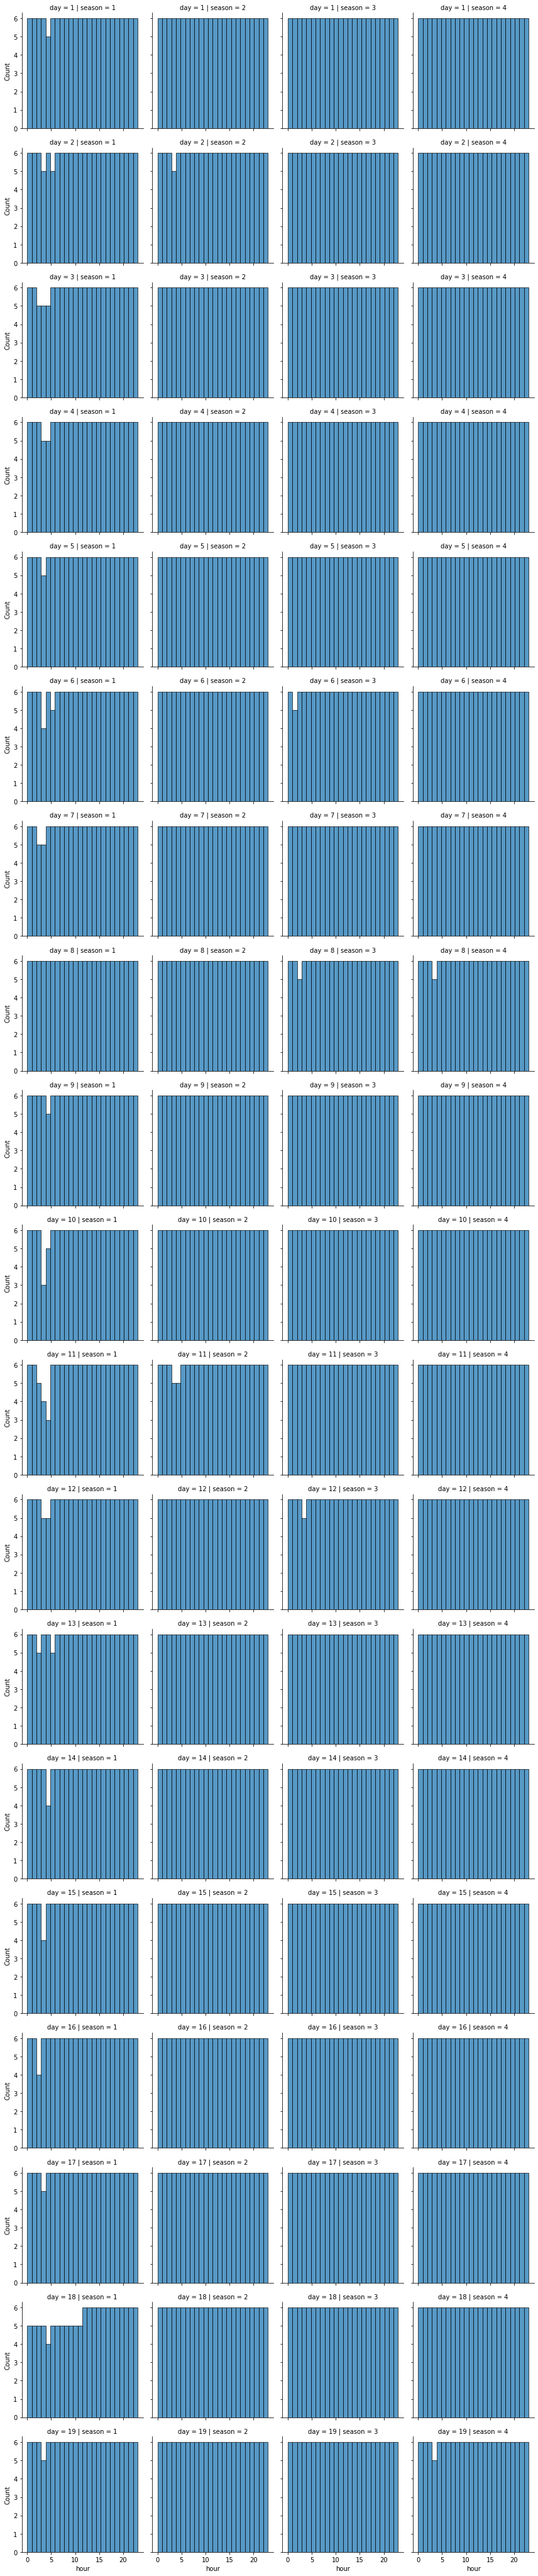

In [285]:
sns.FacetGrid(data=train_bikes2,col='season',row='day').map(sns.histplot,'hour',bins=24)

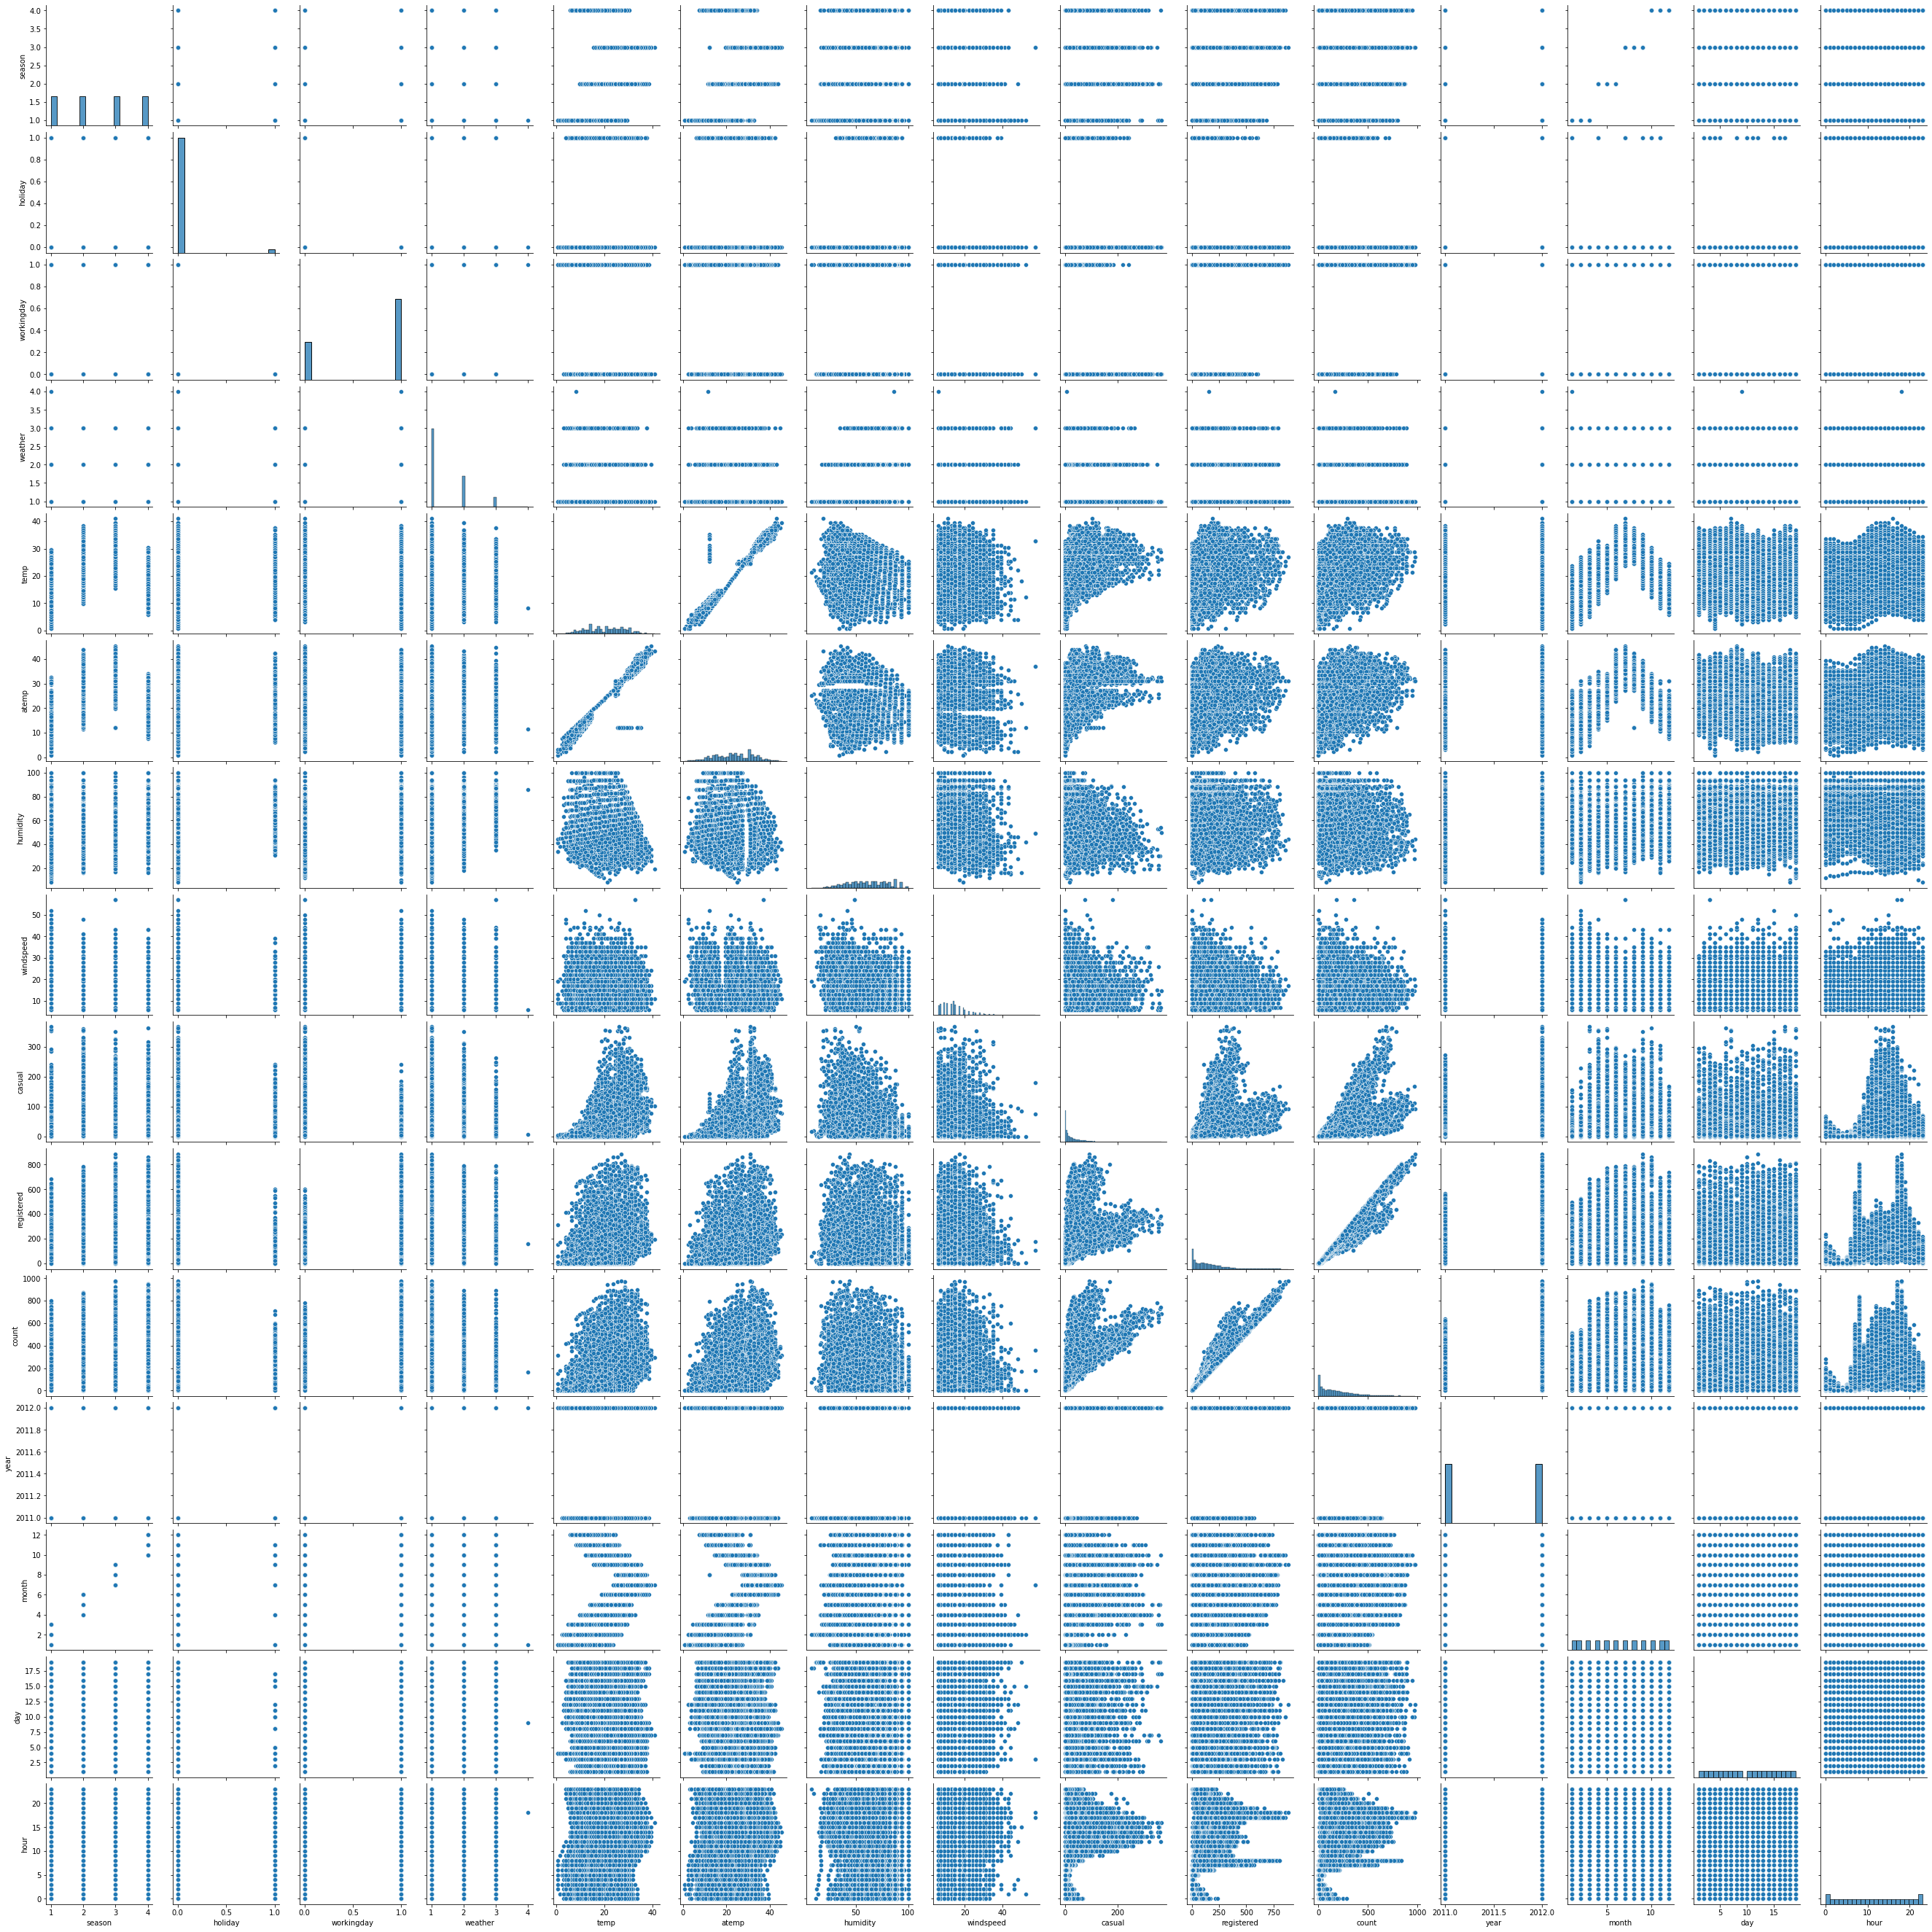

In [185]:
sns.pairplot(train_bikes2)

In [186]:
train_bikes2.head()

season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395      81.0  14.554917   
1       1        0           0        1  9.02  13.635      80.0  14.554917   
2       1        0           0        1  9.02  13.635      80.0  14.554917   
3       1        0           0        1  9.84  14.395      75.0  14.554917   
4       1        0           0        1  9.84  14.395      75.0  14.554917   

   casual  registered  count  year  month  day  hour  
0       3          13     16  2011      1    1     0  
1       8          32     40  2011      1    1     1  
2       5          27     32  2011      1    1     2  
3       3          10     13  2011      1    1     3  
4       0           1      1  2011      1    1     4

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'total_count Vs hour')

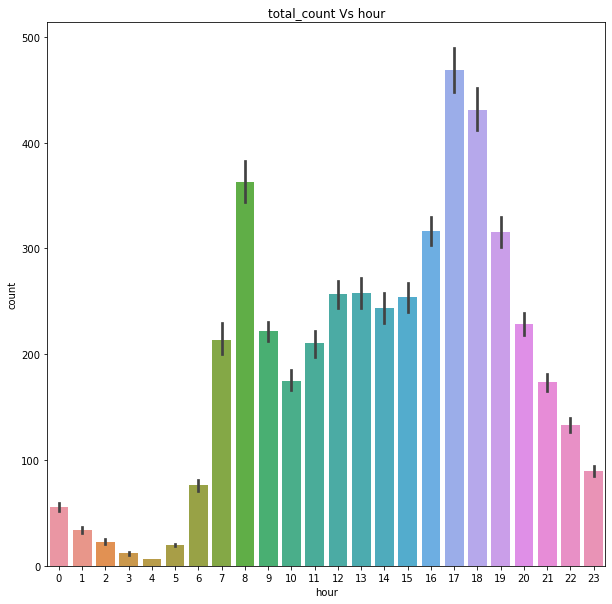

In [200]:
plt.figure(figsize=(10,10))
sns.barplot('hour','count',data=train_bikes2)
plt.title('total_count Vs hour')

In [ ]:
## Observation: this is the required -  'total count' per 'hr' plot

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'total_count Vs hour')

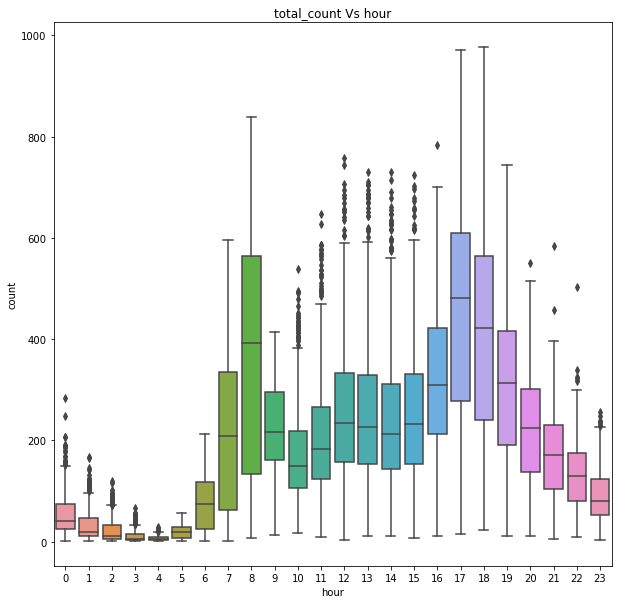

In [208]:
plt.figure(figsize=(10,10))
sns.boxplot('hour','count',data=train_bikes2)
plt.title('total_count Vs hour')

In [ ]:
## Observation: data have outliars

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='count'>

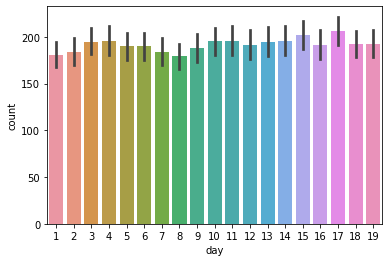

In [189]:
sns.barplot('day','count',data=train_bikes2)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


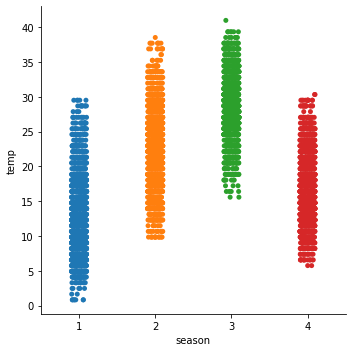

In [205]:
sns.catplot('season','temp',data=train_bikes2)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='temp', ylabel='count'>

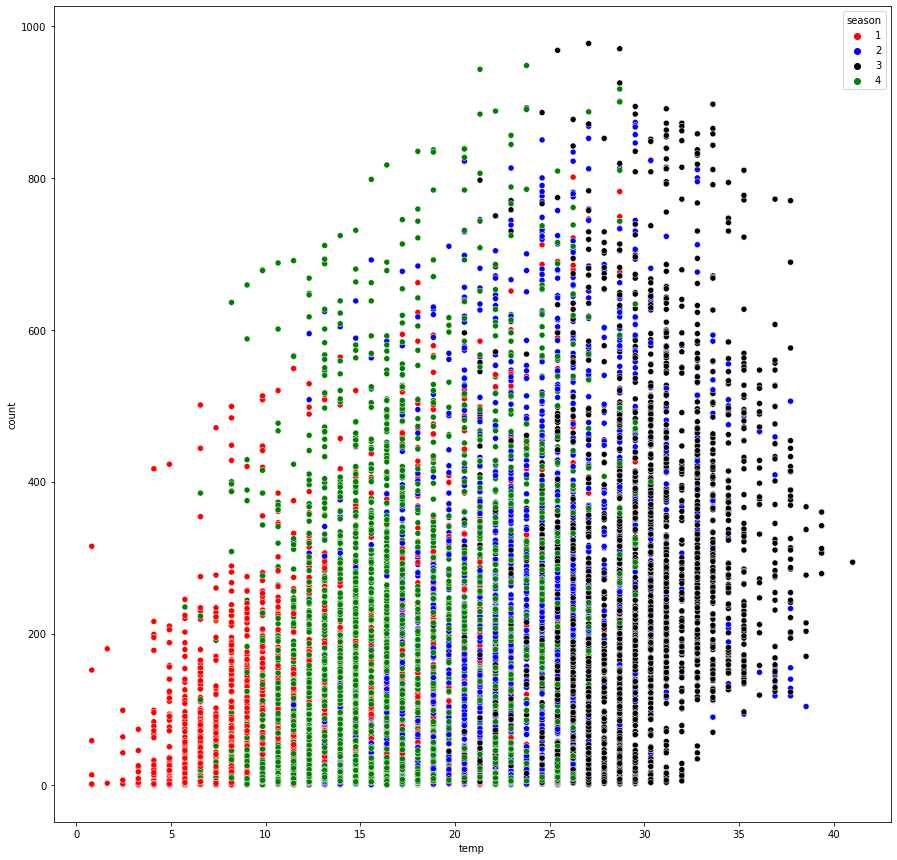

In [198]:
plt.figure(figsize=(15,15))
sns.scatterplot('temp','count',data=train_bikes2,hue='season',palette=['red','blue','black','green'])

In [ ]:
## Observation: in season 1 less people use bycycle due to low temp.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='holiday', ylabel='count'>

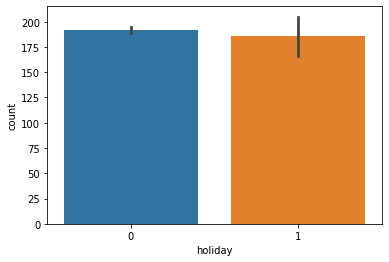

In [201]:
sns.barplot('holiday','count',data=train_bikes2)

In [ ]:
## Observation: in holidays bycycle usage is slightly lesser than usage in working days

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='workingday', ylabel='count'>

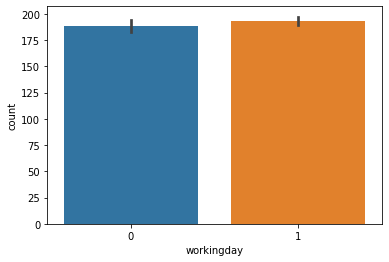

In [202]:
sns.barplot('workingday','count',data=train_bikes2)

In [206]:
train_bikes2.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'year',
       'month', 'day', 'hour'],
      dtype='object')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='atemp', ylabel='count'>

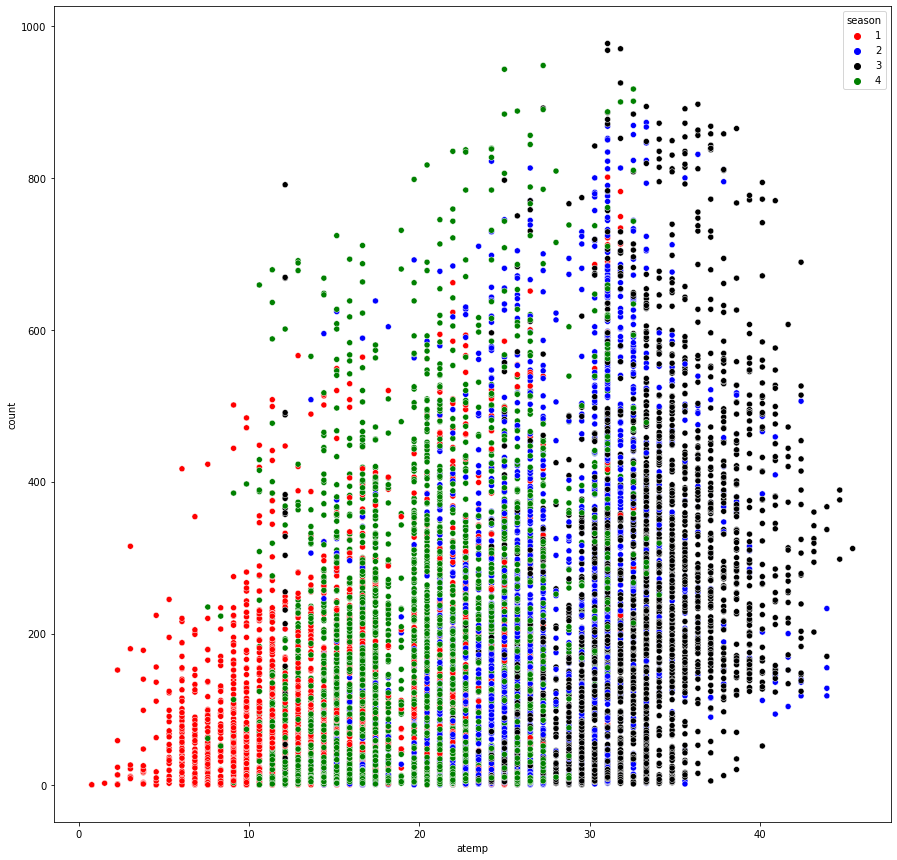

In [207]:
plt.figure(figsize=(15,15))
sns.scatterplot('atemp','count',data=train_bikes2,hue='season',palette=['red','blue','black','green'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='season', ylabel='windspeed'>

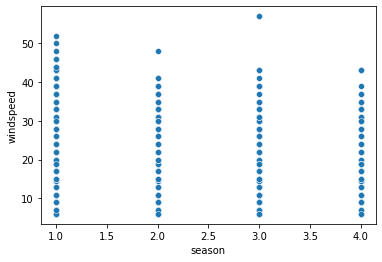

In [209]:
sns.scatterplot('season','windspeed',data=train_bikes2)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='count', ylabel='windspeed'>

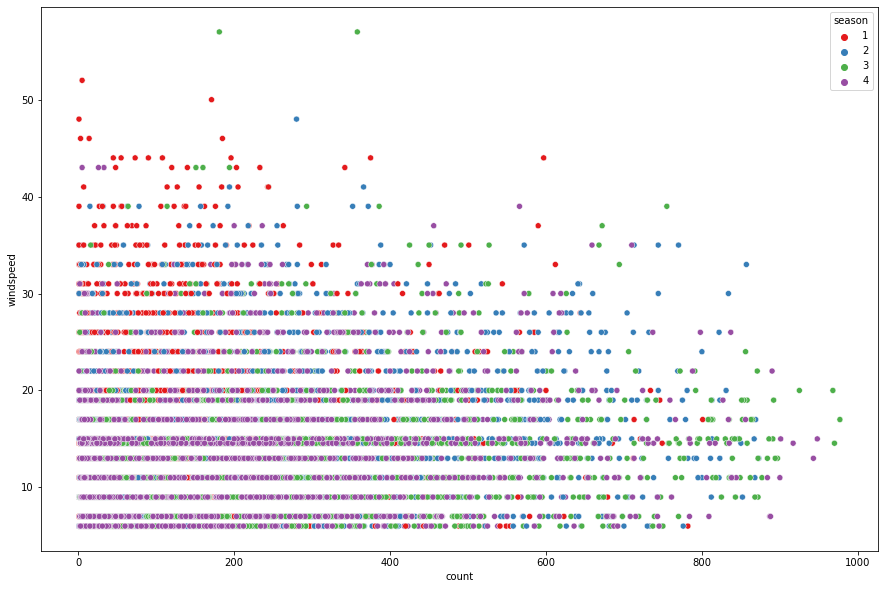

In [226]:
plt.figure(figsize=(15,10))
sns.scatterplot('count','windspeed',data=train_bikes2,hue='season',palette='Set1')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='season'>

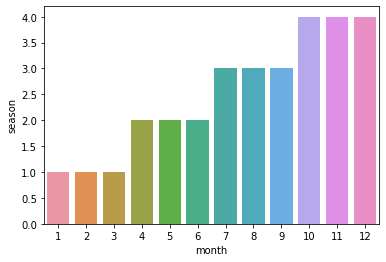

In [228]:
sns.barplot('month','season',data=train_bikes2)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='temp', ylabel='windspeed'>

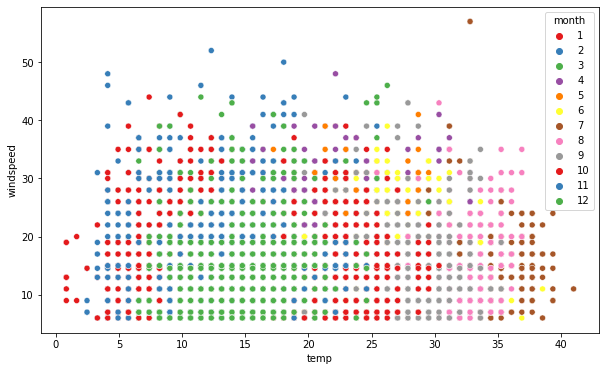

In [223]:
plt.figure(figsize=(10,6))
sns.scatterplot('temp','windspeed',data=train_bikes2,palette='Set1',hue='month')

In [ ]:
## Observation: in season 1 as compaired to temp, windspeed is more.